In [52]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# customer data file path. Edit this 
file_path = 'C:\\Users\\xinyu\\OneDrive\\桌面\\Python\\classwork\\numpy\\Customer Data.csv'

#### **1. Importing CSV File and Filling in Missing Data**

In [83]:
def data_prep(file_path):
    df = pd.read_csv(file_path)

    #replace gender with 0 and 1
    replacement = {'Male': 0, 'Female': 1}
    df['Gender'] = df['Gender'].map(replacement)

    # convert to numpy
    data = df.to_numpy()

    #replace nan values with mean of each column
    for i in range(1, data.shape[1]):
        mean = int(np.nanmean(data[:, i]))
        index = np.where(np.isnan(data[:, i]))
        data[:, i][index] = mean
    
    # convert value type to int
    data = data.astype(int)
    return data

data = data_prep(file_path)
print(data)

[[  1  56  81  93   1]
 [  2  69  70  67   1]
 [  3  46  78  76   1]
 [  4  32 137  26   1]
 [  5  60 115  16   1]
 [  6  25 132  51   1]
 [  7  38  81  86   1]
 [  8  56  71  57   0]
 [  9  36  31  29   0]
 [ 10  40  58  78   0]
 [ 11  28 149  92   0]
 [ 12  28 132  69   0]
 [ 13  41 120  47   0]
 [ 14  53 132  94   0]
 [ 15  57 100  62   1]
 [ 16  41  90  69   1]
 [ 17  20  21  76   0]
 [ 18  39 149  16   0]
 [ 19  19  73  90   1]
 [ 20  41 106  90   0]
 [ 21  61 148  48   0]
 [ 22  47 145  85   1]
 [ 23  55 149  39   0]
 [ 24  19  72 100   1]
 [ 25  38  87  33   0]
 [ 26  50 142  94   1]
 [ 27  43  57  23   1]
 [ 28  39  43  10   1]
 [ 29  61  88  69   0]
 [ 30  42 135 100   1]
 [ 31  66 117  34   0]
 [ 32  44  90  52   0]
 [ 33  59 143  95   0]
 [ 34  45  89  10   0]
 [ 35  33  90  19   1]
 [ 36  32  22  58   1]
 [ 37  64 109  96   0]
 [ 38  68 115   1   0]
 [ 39  61  71  69   1]
 [ 40  69 147   4   0]
 [ 41  20  58  16   1]
 [ 42  54 101  24   0]
 [ 43  68 123  80   0]
 [ 44  24 1

#### **2. Summary Statistics**

In [89]:
# calculate the summary statistics 
mean = np.nanmean(data[:,1:4],axis=0)
median = np.nanmedian(data[:,1:4],axis=0)
std = np.nanstd(data[:,1:4],axis=0)
minn = np.nanmin(data[:,1:4],axis=0)
maxx = np.nanmax(data[:,1:4],axis=0)
percentiles = np.nanpercentile(data[:,1:4],[25,50,75],axis=0)

# Match column head with statistics
statistics = {
    'Mean': mean,
    'Median': median,
    'Standard Deviation': std,
    'Minimum': minn,
    'Maximum': maxx,
    '25th Percentile': percentiles[0],
    '50th Percentile': percentiles[1],
    '75th Percentile': percentiles[2]
}

# Create a summary table
summary = pd.DataFrame(statistics, index=['Age', 'Annual Income', 'Spending Score'])

# display table
print(summary)

                  Mean  Median  Standard Deviation  Minimum  Maximum  \
Age             43.645    43.0           14.615368       18       69   
Annual Income   90.795    88.0           38.647677       20      149   
Spending Score  50.925    50.0           28.900335        1      100   

                25th Percentile  50th Percentile  75th Percentile  
Age                       31.00             43.0            56.00  
Annual Income             60.25             88.0           128.00  
Spending Score            25.75             50.0            75.25  


#### **3. Normalizing Data**

In [92]:
#create a type float copy of data
normalized = np.copy(data).astype(float)

#set the output format so that only 2 decimals are printed
np.set_printoptions(suppress=True, formatter={'float_kind': '{:0.2f}'.format})

#calculate the normalized values 
normalized[:,2] = (normalized[:,2]-minn[1])/(maxx[1]-minn[1])
normalized[:,3] = (normalized[:,3]-minn[2])/(maxx[2]-minn[2])

# display result
print(normalized)

[[1.00 56.00 0.47 0.93 1.00]
 [2.00 69.00 0.39 0.67 1.00]
 [3.00 46.00 0.45 0.76 1.00]
 [4.00 32.00 0.91 0.25 1.00]
 [5.00 60.00 0.74 0.15 1.00]
 [6.00 25.00 0.87 0.51 1.00]
 [7.00 38.00 0.47 0.86 1.00]
 [8.00 56.00 0.40 0.57 0.00]
 [9.00 36.00 0.09 0.28 0.00]
 [10.00 40.00 0.29 0.78 0.00]
 [11.00 28.00 1.00 0.92 0.00]
 [12.00 28.00 0.87 0.69 0.00]
 [13.00 41.00 0.78 0.46 0.00]
 [14.00 53.00 0.87 0.94 0.00]
 [15.00 57.00 0.62 0.62 1.00]
 [16.00 41.00 0.54 0.69 1.00]
 [17.00 20.00 0.01 0.76 0.00]
 [18.00 39.00 1.00 0.15 0.00]
 [19.00 19.00 0.41 0.90 1.00]
 [20.00 41.00 0.67 0.90 0.00]
 [21.00 61.00 0.99 0.47 0.00]
 [22.00 47.00 0.97 0.85 1.00]
 [23.00 55.00 1.00 0.38 0.00]
 [24.00 19.00 0.40 1.00 1.00]
 [25.00 38.00 0.52 0.32 0.00]
 [26.00 50.00 0.95 0.94 1.00]
 [27.00 43.00 0.29 0.22 1.00]
 [28.00 39.00 0.18 0.09 1.00]
 [29.00 61.00 0.53 0.69 0.00]
 [30.00 42.00 0.89 1.00 1.00]
 [31.00 66.00 0.75 0.33 0.00]
 [32.00 44.00 0.54 0.52 0.00]
 [33.00 59.00 0.95 0.95 0.00]
 [34.00 45.00 0.53 

Normalization is important because it allows data to be in a common scale while still preserving their differences. 

#### **4. Data Segmentation**

In [97]:
# calculate the needed numbers 
above60 = data[:,2]>60
meanScore60 = np.mean(data[above60,3],axis=0)
Percent25younger = np.shape(data[:,1][data[:,1]<=25])[0] / data[-1][0] * 100
males = data[:,4]==0
females = data[:,4]==1

# display the result
print("Average Spending Score for customers with Annual Income above $60,000:",meanScore60)
print(f"Percentage of customers aged 25 and below: {Percent25younger}%")
print("Average Annual Income for male:",np.mean(data[males,2]))
print("Average Annual Income for female:",np.mean(data[females,2]))

Average Spending Score for customers with Annual Income above $60,000: 51.17333333333333
Percentage of customers aged 25 and below: 15.5%
Average Annual Income for male: 90.16190476190476
Average Annual Income for female: 91.49473684210527


#### **5. K-Means Clustering for Customer Segmentation**

In [100]:
# set number of cluster to 3
K = 3
# randomly assign centroids 
centroids = data[np.random.choice(data.shape[0], K, replace=False),2:4]

# K-Means Algorithm
def k_means(data, centroids, K, iterations=100):
    for i in range(iterations):
        # Assign clusters based on nearest centroid
        distances = np.sqrt(((data - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Update centroids by calculating the mean of points in each cluster
        new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(K)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Run K-Means
final_centroids, labels = k_means(data[:,2:4], centroids, K)
# display centroid coordinates 
print(final_centroids)

[[74.53 81.37]
 [130.90 42.66]
 [55.78 34.02]]


In [102]:
# display the cluster label of each customer with their customer id
print("(Customer, Cluster Label):")
for i in range(len(labels)):
    e="\n" if (i+1)%10==0 else "\t"
    print(f"({i+1},{labels[i]})",end=e) 

(Customer, Cluster Label):
(1,0)	(2,0)	(3,0)	(4,1)	(5,1)	(6,1)	(7,0)	(8,0)	(9,2)	(10,0)
(11,1)	(12,1)	(13,1)	(14,1)	(15,0)	(16,0)	(17,0)	(18,1)	(19,0)	(20,0)
(21,1)	(22,1)	(23,1)	(24,0)	(25,2)	(26,1)	(27,2)	(28,2)	(29,0)	(30,1)
(31,1)	(32,0)	(33,1)	(34,2)	(35,2)	(36,2)	(37,0)	(38,1)	(39,0)	(40,1)
(41,2)	(42,1)	(43,1)	(44,1)	(45,0)	(46,2)	(47,0)	(48,0)	(49,1)	(50,1)
(51,2)	(52,1)	(53,2)	(54,1)	(55,0)	(56,2)	(57,2)	(58,1)	(59,0)	(60,0)
(61,1)	(62,1)	(63,0)	(64,1)	(65,1)	(66,1)	(67,1)	(68,1)	(69,0)	(70,1)
(71,1)	(72,1)	(73,0)	(74,0)	(75,0)	(76,2)	(77,2)	(78,1)	(79,1)	(80,0)
(81,1)	(82,1)	(83,0)	(84,2)	(85,1)	(86,2)	(87,2)	(88,0)	(89,2)	(90,2)
(91,2)	(92,1)	(93,2)	(94,1)	(95,0)	(96,2)	(97,0)	(98,2)	(99,0)	(100,0)
(101,2)	(102,1)	(103,2)	(104,0)	(105,1)	(106,2)	(107,2)	(108,1)	(109,2)	(110,0)
(111,0)	(112,1)	(113,2)	(114,1)	(115,0)	(116,0)	(117,0)	(118,2)	(119,0)	(120,1)
(121,2)	(122,1)	(123,2)	(124,0)	(125,1)	(126,1)	(127,2)	(128,1)	(129,2)	(130,0)
(131,0)	(132,1)	(133,0)	(134,2)	(135,0)	(

#### **6. Data Visualization**

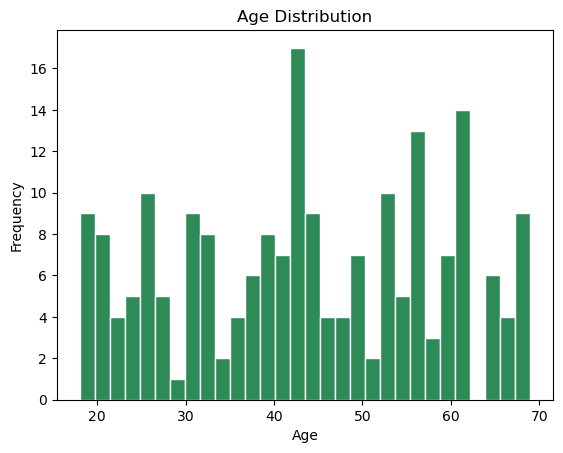

In [105]:
# Age Histogram
plt.hist(data[:,1], bins=30, edgecolor='white', color='seagreen')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

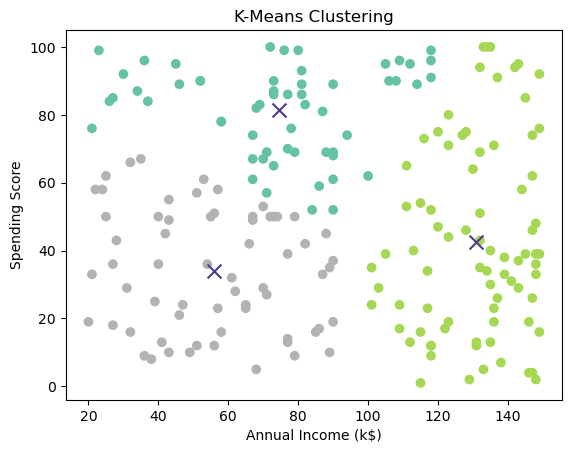

In [129]:
# K-mean cluster
plt.scatter(data[:, 2], data[:, 3], c=labels, cmap='Set2')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='darkslateblue', marker='x', s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("K-Means Clustering")
plt.show()

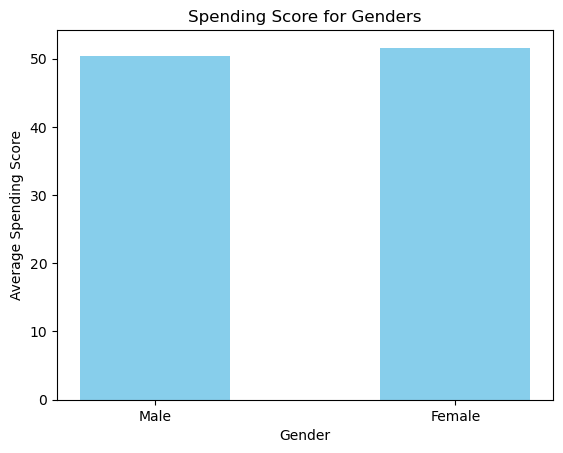

In [115]:
# bar chart comparing the average spending score of male and female
plt.bar(["Male","Female"], [np.mean(data[males,3]),np.mean(data[females,3])], color='skyblue', width=0.5)
plt.title("Spending Score for Genders")
plt.xlabel("Gender")
plt.ylabel("Average Spending Score")
plt.show()

#### **7. Documentation and Summary**
The distribution of customer age is approximately normal, ranging from 18 to 69. The annual income varies from 20k to 149k. Male customers and female customers have approximately the same spending score. 

There are three clusters: high income with low spending, moderately high income with high spending, and low income with moderate spending. These clusters suggest that customers with moderately high income like to spend more money, so the store can target these customers in their advertisements. They can also offer discounts to attract those with lower income to spend more. 

Initially, I used genfromtxt to load the csv file, but all the male customers were converted into females, so I used read_csv instead. 
The clusters also didn’t work when I used “fancy indexing”. I still don’t know why, but slicing works. 
I tried using chatgpt and copilot to help me do this project, but they created more bugs while solving bugs